In [1]:
from pathlib import Path

processed_data_dir = Path('../data/processed/')
file_name = 'train.csv'
file_path = processed_data_dir / file_name

from src.utils import html_table

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(file_path)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


### Try simple OLS

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

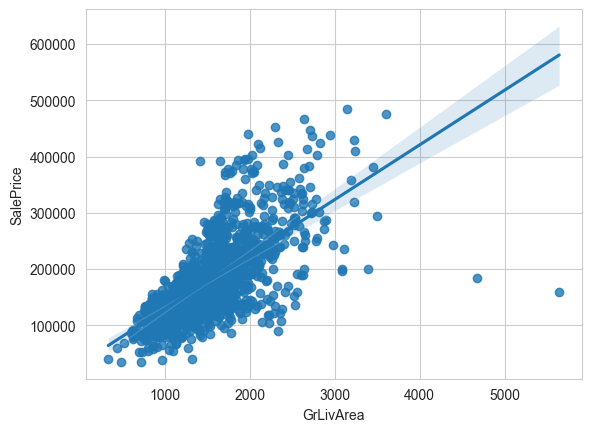

In [11]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df)

In [10]:
x = df['GrLivArea'].values
y = df['SalePrice'].values
# np.polyfit(x,y,deg=1)
x_mean = x.mean()
y_mean = y.mean()
x_me = x - x_mean
y_me = y- y_mean
x_sme = np.sum(x_me**2)
m = np.sum(x_me*y_me)/x_sme
b = y_mean - m*x_mean
print(f'y_hat_i = {np.round(m, decimals=3)}*x_i + {np.round(b, decimals=3)}')

y_hat_i = 97.269*x_i + 31670.473


In [12]:
line_x = np.linspace(np.min(x), np.max(x), 2)
line_y = line_x*m + b

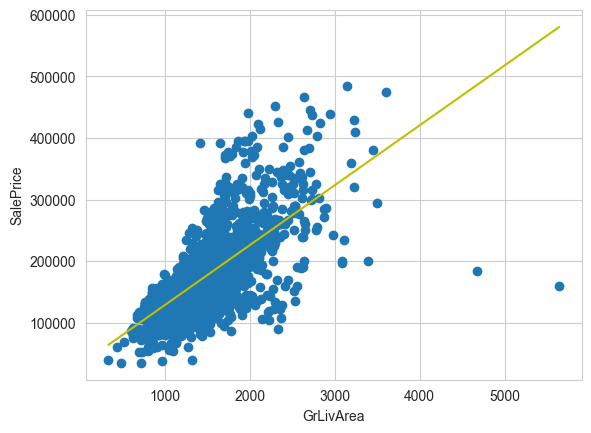

In [15]:
fig, ax = plt.subplots()
ax.plot(line_x, line_y, color='y')
ax.scatter(x, y)
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

In [24]:
y_pred = x*m+b
R2 = 1 - (np.sum((y-y_pred)**2)/np.sum(y_me**2))

print(f'GrLivArea describe {np.round(R2, decimals=4)*100}% of SalePrice\'s varience.')

GrLivArea describe 47.4% of SalePrice's varience.


In [31]:
import statsmodels.api as sm
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1297.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          4.12e-203
Time:                        16:51:25   Log-Likelihood:                -17704.
No. Observations:                1442   AIC:                         3.541e+04
Df Residuals:                    1440   BIC:                         3.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.167e+04   4285.965      7.389      0.0

### Multiple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
lin_reg.score(X_train, y_train)
lin_reg.score(X_test, y_test)

0.6115052618030519